In [2]:
library(rJava)
source("https://bioconductor.org/biocLite.R")
# biocLite("org.Hs.eg.db")
biocLite("RDAVIDWebService")

Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) ‘RDAVIDWebService’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'AnnotationHub', 'backports', 'broom', 'cluster', 'colorspace',
  'data.table', 'DBI', 'digest', 'forcats', 'ggplot2', 'IRanges', 'jsonlite',
  'Matrix', 'mgcv', 'nlme', 'openssl', 'pbdZMQ', 'pbkrtest', 'psych', 'Rcpp',
  'RcppEigen', 'readr', 'rprojroot', 'S4Vectors', 'selectr', 'shiny',
  'SparseM', 'stringi', 'stringr', 'survival', 'tidyr', 'tidyverse', 'xml2',
  'XVector', 'zoo'


In [2]:
#libraries
library(GO.db)
library(topGO)
library(org.Hs.eg.db)
library(org.Sc.sgd.db)
library(GOSemSim)

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

 

In [3]:
file <- "Uetz_screen"

p <- 0.2
init <- 30

db <- org.Sc.sgd.db
mapping <- "org.Sc.sgd.db"
ID <- "ENSEMBL"
# db <- org.Hs.eg.db
# mapping <- "org.Hs.eg.db"
# ID <- "ENTREZ"

In [4]:
#background gene list
setwd('/home/david/Documents/ghsom')
allGenes <- scan(sprintf("%s.txt", file), character())
allGenes <- unique(allGenes) 
length(allGenes)

[1] 806

In [5]:
##load all community gene lists
setwd(sprintf("/home/david/Documents/ghsom/uetz_communities_%s_%s", p, init))
# setwd("/home/david/Documents/ghsom/union_communities_08")
# setwd("/home/david/Documents/ghsom/hi_communities_08")

g <- list()
numCom <- 0
filename <- sprintf("community_%s.txt", numCom)
while (file.exists(filename)) {
    numCom <- numCom + 1
    g[[numCom]] <- scan(filename, character())
    filename <- sprintf("community_%s.txt", numCom)
}
numCom

[1] 25

In [6]:
#distances between neurons
shortest.path <- read.csv("shortest_path.csv", sep=",", header=FALSE)

In [61]:
cutOff <- 0.01

filename <- sprintf("%s-%s-%s.rda", file, p, cutOff)

if (file.exists(filename)){
    
    print(sprintf("loading: %s", filename))
    load(filename)
    print("loaded")
    
} else {
    
    print("creating topGO objects")

    geneLists <- vector("list", numCom) 
    GOdataObjects <- vector("list", numCom) 
    resultFishers <- vector("list", numCom) 
    results <- vector("list", numCom) 
    gos <- vector("list", numCom) 

    #perform enrichment analyses
    for (c in 1:numCom){

        #factor of interesting genes
        geneList <- factor(as.integer(allGenes %in% g[[c]]))
        names(geneList) <- allGenes
        geneLists[[c]] <- geneList

        #construct topGO object
        GOdata <- new("topGOdata", description=sprintf("topGO object for community %s", c),
                      ontology = "BP", allGenes = geneList,
                      annotationFun = annFUN.org, mapping = mapping, 
                      ID = ID, nodeSize = 10)
        GOdataObjects[[c]] <- GOdata

        #fishers exact test classic
        resultFisher <- runTest(GOdata, algorithm = "classic", statistic = "fisher")
        resultFishers[[c]] <- resultFisher

        #tabulate results
        allRes <- GenTable(GOdata, classicFisher = resultFisher,
                      orderBy = "classicFisher", topNodes = 500)
        results[[c]] <- allRes

        #go terms < cut off 
        gos[[c]] <- score(resultFisher)[score(resultFisher) < cutOff]

        print(sprintf("community %s complete", c))
    }
    
    print(sprintf("Saving data: %s", filename))
    save(geneLists, GOdataObjects, resultFishers, results, gos, file=filename)
    print("saved")
}

[1] "creating topGO objects"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 241 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 1 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 141 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 2 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 263 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 3 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 193 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 4 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 277 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 5 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 271 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 6 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 182 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 7 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 162 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 8 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 278 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 9 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 89 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 10 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 94 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 11 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 249 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 12 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 203 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 13 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 211 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 14 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 217 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 15 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 171 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 16 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 256 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 17 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 290 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 18 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 304 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 19 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 46 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 20 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 197 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 21 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 320 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 22 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 130 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 23 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 232 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 24 complete"



Building most specific GOs .....
	( 1106 GO terms found. )

Build GO DAG topology ..........
	( 2835 GO terms and 6413 relations. )

Annotating nodes ...............
	( 770 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 158 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "community 25 complete"
[1] "Saving data: Uetz_screen-0.2-0.01.rda"
[1] "saved"


In [8]:
##SEMATIC SIMILARITY
#construct gosemsim object
semsimfile <- sprintf("%s-semsimfile.rda", file)
if (file.exists(semsimfile)){
    print(sprintf("loading: %s", semsimfile))
    load(semsimfile)
    print("loaded")
} else {
    print(sprintf("creating %s", semsimfile))
    hsGO <- godata(mapping, ont="BP", keytype=ID)
    save(hsGO, file=semsimfile)
    print(sprintf("saved semsimfile: %s", semsimfile))
}


[1] "loading: Uetz_screen-semsimfile.rda"
[1] "loaded"


In [9]:
information_content <- function(term){
    return (goSim(term, term, semData=hsGO, measure="Resnik"))
}

In [10]:
most_representative_term_ic <- function(namedTerms){
    ics <- sapply(names(namedTerms), information_content)
    names(ics) <- names(namedTerms)
    return(names(sort(ics, decreasing=TRUE)[1]))
}

In [31]:
most_representative_term_ancestor <- function(namedTerms){
    
    counts <- numeric(length(namedTerms))
    names(counts) <- names(namedTerms)

    for (term in names(namedTerms)) {
        ancestors <- as.list(GOBPANCESTOR[term])
        for (ancestor in ancestors[[term]]) {
            if (ancestor %in% names(counts)) {
                counts[ancestor] <- counts[ancestor] + 1
            }
        }

    }
#     return (sort(names(counts), decreasing=TRUE)[1])
    return (names(sort(counts / sum(counts), decreasing=TRUE)[1]))
}

In [64]:
sapply(gos, function(g){length(g)})

[1] 12 32 40  0 41  5  4 22  0  2  1  5  0 10 56  0 26  7  6  0  6 21  0 20  5

In [62]:
representativeTermsAncestor <- sapply(Filter(length, gos), most_representative_term_ancestor)

In [65]:
representativeTermsAncestor <-representativeTermsAncestor[!is.na(representativeTermsAncestor)] 

In [66]:
representativeTermsAncestor

[1] "GO:0023052" "GO:0051169" "GO:0006793" "GO:0008152" "GO:0007049"
 [6] "GO:0055080" "GO:0006810" "GO:0016071" "GO:0051321" "GO:0022402"
[11] "GO:0006996" "GO:0044710" "GO:0044710" "GO:0016569" "GO:0048519"
[16] "GO:0051234" "GO:0006352"

In [34]:
representativeTermsIC <- sapply(Filter(length, gos), most_representative_term_ic)

In [35]:
representativeTermsIC

[1] "GO:0031929" "GO:0051123" "GO:0044805" "GO:0044772" "GO:0017148"
 [6] "GO:0006323" "GO:0030242" "GO:0006997" "GO:0009064" "GO:0032880"
[11] "GO:0009894" "GO:0000724" "GO:0030154" "GO:0007131" "GO:0031577"
[16] "GO:0032273" "GO:0043094" "GO:0045333" "GO:0043648" "GO:0006348"
[21] "GO:0006312" "GO:0031503" "GO:0051123"

In [67]:
select(GO.db, keys=representativeTermsAncestor, columns=c("TERM", "DEFINITION"))

'select()' returned many:1 mapping between keys and columns


GOID,TERM,DEFINITION
GO:0023052,signaling,The entirety of a process in which information is transmitted within a biological system. This process begins with an active signal and ends when a cellular response has been triggered.
GO:0051169,nuclear transport,"The directed movement of substances into, out of, or within the nucleus."
GO:0006793,phosphorus metabolic process,"The chemical reactions and pathways involving the nonmetallic element phosphorus or compounds that contain phosphorus, usually in the form of a phosphate group (PO4)."
GO:0008152,metabolic process,"The chemical reactions and pathways, including anabolism and catabolism, by which living organisms transform chemical substances. Metabolic processes typically transform small molecules, but also include macromolecular processes such as DNA repair and replication, and protein synthesis and degradation."
GO:0007049,cell cycle,"The progression of biochemical and morphological phases and events that occur in a cell during successive cell replication or nuclear replication events. Canonically, the cell cycle comprises the replication and segregation of genetic material followed by the division of the cell, but in endocycles or syncytial cells nuclear replication or nuclear division may not be followed by cell division."
GO:0055080,cation homeostasis,Any process involved in the maintenance of an internal steady state of cations within an organism or cell.
GO:0006810,transport,"The directed movement of substances (such as macromolecules, small molecules, ions) or cellular components (such as complexes and organelles) into, out of or within a cell, or between cells, or within a multicellular organism by means of some agent such as a transporter, pore or motor protein."
GO:0016071,mRNA metabolic process,"The chemical reactions and pathways involving mRNA, messenger RNA, which is responsible for carrying the coded genetic 'message', transcribed from DNA, to sites of protein assembly at the ribosomes."
GO:0051321,meiotic cell cycle,"Progression through the phases of the meiotic cell cycle, in which canonically a cell replicates to produce four offspring with half the chromosomal content of the progenitor cell via two nuclear divisions."
GO:0022402,cell cycle process,The cellular process that ensures successive accurate and complete genome replication and chromosome segregation.


In [68]:
simsGOAncestor <- mgoSim(representativeTermsAncestor, representativeTermsAncestor, semData=hsGO, measure="Resnik", combine=NULL)

In [69]:
head(simsGOAncestor)

,GO:0023052,GO:0051169,GO:0006793,GO:0008152,GO:0007049,GO:0055080,GO:0006810,GO:0016071,GO:0051321,GO:0022402,GO:0006996,GO:0044710,GO:0016569,GO:0048519,GO:0051234,GO:0006352
GO:0023052,0.368,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
GO:0051169,0.000,0.424,0.000,0.000,0.000,0.00,0.174,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.172,0.000
GO:0006793,0.000,0.000,0.266,0.063,0.031,0.00,0.000,0.075,0.031,0.031,0.031,0.063,0.063,0.000,0.000,0.075
GO:0008152,0.000,0.000,0.063,0.063,0.000,0.00,0.000,0.063,0.000,0.000,0.000,0.063,0.063,0.000,0.000,0.063
GO:0007049,0.000,0.000,0.031,0.000,0.261,0.00,0.000,0.031,0.261,0.261,0.031,0.098,0.031,0.000,0.000,0.031
GO:0055080,0.000,0.000,0.000,0.000,0.000,0.47,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.171,0.000,0.000


In [70]:
simsGOIC <- mgoSim(representativeTermsIC, representativeTermsIC, semData=hsGO, measure="Resnik", combine=NULL)

In [71]:
head(simsGOIC)

,GO:0031929,GO:0051123,GO:0044805,GO:0044772,GO:0017148,GO:0006323,GO:0030242,GO:0006997,GO:0009064,GO:0032880,⋯,GO:0030154,GO:0007131,GO:0031577,GO:0032273,GO:0043094,GO:0045333,GO:0043648,GO:0006348,GO:0006312,GO:0031503
GO:0031929,0.615,0.031,0.031,0.116,0.189,0.031,0.031,0.031,0.116,0.184,⋯,0.116,0.116,0.116,0.189,0.031,0.116,0.116,0.189,0.031,0
GO:0051123,0.031,0.608,0.031,0.031,0.177,0.171,0.171,0.171,0.107,0.000,⋯,0.031,0.171,0.031,0.357,0.148,0.075,0.075,0.269,0.141,0
GO:0044805,0.031,0.031,0.725,0.031,0.031,0.031,0.425,0.031,0.031,0.000,⋯,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0
GO:0044772,0.116,0.031,0.031,0.458,0.031,0.031,0.031,0.031,0.116,0.000,⋯,0.116,0.291,0.291,0.031,0.031,0.116,0.116,0.116,0.031,0
GO:0017148,0.189,0.177,0.031,0.031,0.626,0.031,0.031,0.031,0.226,0.184,⋯,0.031,0.115,0.031,0.189,0.148,0.075,0.075,0.379,0.115,0
GO:0006323,0.031,0.171,0.031,0.031,0.031,0.556,0.224,0.224,0.031,0.000,⋯,0.031,0.224,0.031,0.171,0.031,0.031,0.031,0.171,0.031,0


In [51]:
head(shortest.path)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,1,2,3,4,1,2,3,4,3,⋯,6,7,5,6,7,8,7,7,8,9
1,0,1,2,3,1,1,2,3,2,⋯,5,6,4,5,6,7,6,6,7,8
2,1,0,1,2,2,1,1,2,2,⋯,4,5,4,4,5,6,5,5,6,7
3,2,1,0,1,3,2,1,1,2,⋯,4,5,4,4,5,6,5,5,6,7
4,3,2,1,0,4,3,2,1,3,⋯,4,5,4,4,5,6,5,5,6,7
1,1,2,3,4,0,1,2,3,2,⋯,5,6,4,5,6,7,6,6,7,8


In [101]:
cluster_similarity <- function(c){
    return(mean(mgeneSim(c, semData=hsGO, measure="Wang", verbose=FALSE)))
}

In [102]:
sapply(g, cluster_similarity)

[1] 0.3321728 0.4426667 0.3328750 0.3061563 0.3779028 0.2696923 0.3577037
 [8] 0.4434400 0.3017422 0.3638889 0.5511111 0.3353878 0.3027755 0.4893889
[15] 0.3806250 0.4237500 0.3998765 0.2835000 0.2819184 0.5335556 0.3278437
[22] 0.3417596 0.3690556 0.3107361 0.4044687

In [32]:
goTerms <- sapply(gos, function(g)names(g))

In [41]:
simsGO <- mgoSim(goTerms[[1]], goTerms[[4]], semData=hsGO, measure="Wang", combine="BMA")

In [104]:
simsGO

[1] 0.219

In [105]:
g[[1]]

[1] "YER179W"  "YMR068W"  "YLR433C"  "YDR326C"  "YGR058W"  "YNL047C" 
 [7] "YER007CA" "YNL201C"  "YPL059W"  "YMR309C"

In [106]:
g[[2]]

[1] "YMR236W" "YGL112C" "YDR383C" "YJL041W" "YGL172W" "YGR119C"

In [79]:
mgoSim(names(gos[[1]]), names(gos[[2]]), semData=hsGO, measure="Wang", combine="BMA")

[1] 0.242

In [87]:
sapply(gos,
       FUN=function(g1, g2){mgoSim(names(g1), names(g2), semData=hsGO, measure="Wang", combine="BMA")}, MARGIN=3)

ERROR: Error in FUN(X[[i]], ...): unused argument (MARGIN = 3)


In [107]:
simfile <- sprintf("%s-sims.rda", file)
if (file.exists(simfile)){
    print(sprintf("loading: %s", simfile))
    load(simfile)
    print("loaded")
} else {
    sims <- mclusterSim(g, semData=hsGO, measure="Wang", combine="BMA")
    save(sims, file=simfile)
    print (sprintf("saved sim file: %s", simfile))
}


[1] "saved sim file: Uetz_screen-sims.rda"


In [110]:
head(sims)

1.000,0.376,0.528,0.437,0.511,0.551,0.466,0.389,0.480,0.361,⋯,0.475,0.402,0.448,0.438,0.228,0.398,0.467,0.422,0.613,0.433
0.376,1.000,0.488,0.426,0.417,0.376,0.485,0.663,0.394,0.485,⋯,0.384,0.397,0.336,0.484,0.270,0.506,0.462,0.396,0.438,0.580
0.528,0.488,1.000,0.537,0.546,0.509,0.605,0.503,0.509,0.424,⋯,0.476,0.445,0.506,0.602,0.238,0.443,0.569,0.481,0.580,0.487
0.437,0.426,0.537,1.000,0.433,0.403,0.471,0.388,0.479,0.421,⋯,0.442,0.424,0.390,0.463,0.299,0.370,0.386,0.461,0.461,0.399
0.511,0.417,0.546,0.433,1.000,0.566,0.456,0.421,0.538,0.367,⋯,0.604,0.454,0.486,0.526,0.210,0.477,0.547,0.521,0.524,0.481
0.551,0.376,0.509,0.403,0.566,1.000,0.441,0.429,0.574,0.412,⋯,0.541,0.524,0.527,0.510,0.246,0.479,0.600,0.453,0.549,0.519


In [127]:
namedGOs <- sapply(gos, function(g)names(g))

In [130]:
namedGOs <- Filter(length, namedGOs)

In [132]:
namedGOs

[[1]]
 [1] "GO:0000003" "GO:0006302" "GO:0007154" "GO:0007163" "GO:0007165"
 [6] "GO:0009966" "GO:0010646" "GO:0016043" "GO:0016049" "GO:0019725"
[11] "GO:0022607" "GO:0023051" "GO:0023052" "GO:0030029" "GO:0030036"
[16] "GO:0031505" "GO:0031929" "GO:0035556" "GO:0040007" "GO:0040008"
[21] "GO:0042592" "GO:0044085" "GO:0044700" "GO:0044763" "GO:0045229"
[26] "GO:0048878" "GO:0050789" "GO:0050794" "GO:0050896" "GO:0051128"
[31] "GO:0051716" "GO:0055082" "GO:0065007" "GO:0065008" "GO:0070887"
[36] "GO:0071555" "GO:0071840" "GO:0071852"

[[2]]
 [1] "GO:0006352" "GO:0006367" "GO:0006403" "GO:0006405" "GO:0006473"
 [6] "GO:0006605" "GO:0006606" "GO:0006886" "GO:0006913" "GO:0015031"
[11] "GO:0015931" "GO:0016569" "GO:0016570" "GO:0017038" "GO:0018193"
[16] "GO:0018205" "GO:0033365" "GO:0034504" "GO:0034613" "GO:0042254"
[21] "GO:0043543" "GO:0044085" "GO:0044744" "GO:0044765" "GO:0045184"
[26] "GO:0046907" "GO:0050657" "GO:0050658" "GO:0051028" "GO:0051123"
[31] "GO:0051168" "GO:0051169" "GO:0051170" "GO:0051236" "GO:0051640"
[36] "GO:0051649" "GO:0051656" "GO:0065004" "GO:0070727" "GO:0070897"
[41] "GO:0071166" "GO:0071426" "GO:0071705" "GO:0071824" "GO:0071840"
[46] "GO:0072594" "GO:1902578" "GO:1902580" "GO:1902582" "GO:1902593"

[[3]]
 [1] "GO:0000045" "GO:0000422" "GO:0001932" "GO:0001934" "GO:0006367"
 [6] "GO:0006464" "GO:0006468" "GO:0006605" "GO:0006623" "GO:0006793"
[11] "GO:0006796" "GO:0006810" "GO:0006886" "GO:0006888" "GO:0006914"
[16] "GO:0007005" "GO:0007033" "GO:0007034" "GO:0007114" "GO:0008104"
[21] "GO:0010562" "GO:0015031" "GO:0016236" "GO:0016237" "GO:0016310"
[26] "GO:0019220" "GO:0019538" "GO:0019954" "GO:0022411" "GO:0030163"
[31] "GO:0030242" "GO:0031399" "GO:0031401" "GO:0032258" "GO:0032270"
[36] "GO:0033036" "GO:0033365" "GO:0033674" "GO:0034613" "GO:0034727"
[41] "GO:0036211" "GO:0042325" "GO:0042327" "GO:0043085" "GO:0043549"
[46] "GO:0044093" "GO:0044257" "GO:0044267" "GO:0044804" "GO:0044805"
[51] "GO:0045184" "GO:0045859" "GO:0045937" "GO:0046907" "GO:0050790"
[56] "GO:0051174" "GO:0051179" "GO:0051234" "GO:0051247" "GO:0051338"
[61] "GO:0051347" "GO:0051641" "GO:0051649" "GO:0061726" "GO:0070727"
[66] "GO:0070925" "GO:0071702" "GO:0072594" "GO:0072665" "GO:0072666"
[71] "GO:1903008" "GO:1905037"

[[4]]
[1] "GO:0044770" "GO:0044772"

[[5]]
 [1] "GO:0000288" "GO:0000956" "GO:0001403" "GO:0005975" "GO:0005996"
 [6] "GO:0006006" "GO:0006109" "GO:0006139" "GO:0006397" "GO:0006401"
[11] "GO:0006402" "GO:0006412" "GO:0006417" "GO:0006461" "GO:0006468"
[16] "GO:0006518" "GO:0006807" "GO:0007124" "GO:0007126" "GO:0007568"
[21] "GO:0007569" "GO:0008152" "GO:0009056" "GO:0009057" "GO:0009059"
[26] "GO:0009267" "GO:0009451" "GO:0009891" "GO:0009893" "GO:0010467"
[31] "GO:0010608" "GO:0016043" "GO:0016049" "GO:0016051" "GO:0016070"
[36] "GO:0016071" "GO:0016310" "GO:0017148" "GO:0019318" "GO:0019439"
[41] "GO:0019538" "GO:0030447" "GO:0031325" "GO:0031328" "GO:0032259"
[46] "GO:0032269" "GO:0032502" "GO:0034248" "GO:0034249" "GO:0034641"
[51] "GO:0034645" "GO:0034655" "GO:0036267" "GO:0040007" "GO:0040008"
[56] "GO:0042594" "GO:0043043" "GO:0043170" "GO:0043254" "GO:0043412"
[61] "GO:0043414" "GO:0043603" "GO:0043604" "GO:0044085" "GO:0044087"
[66] "GO:0044182" "GO:0044237" "GO:0044238" "GO:0044248" "GO:0044260"
[71] "GO:0044262" "GO:0044265" "GO:0044267" "GO:0044270" "GO:0044723"
[76] "GO:0044767" "GO:0046700" "GO:0048518" "GO:0048519" "GO:0048522"
[81] "GO:0048523" "GO:0048869" "GO:0050789" "GO:0050794" "GO:0051128"
[86] "GO:0051171" "GO:0051248" "GO:0065007" "GO:0070271" "GO:0070783"
[91] "GO:0071704" "GO:0071840" "GO:0090304" "GO:0090305" "GO:1901361"
[96] "GO:1901575" "GO:1903046"

[[6]]
 [1] "GO:0000280" "GO:0006323" "GO:0006997" "GO:0007049" "GO:0007126"
 [6] "GO:0007127" "GO:0010564" "GO:0022402" "GO:0044702" "GO:0045132"
[11] "GO:0048285" "GO:0048522" "GO:0051321" "GO:0065007" "GO:0071103"
[16] "GO:1903046"

[[7]]
 [1] "GO:0006810" "GO:0006873" "GO:0006914" "GO:0007031" "GO:0007034"
 [6] "GO:0010256" 

In [139]:
simsGO <- mgoSim(namedGOs[[1]], namedGOs[[17]], semData=hsGO, measure="Resnik", combine="BMA")

In [140]:
simsGO

[1] 0.071

In [136]:
head(shortest.path)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,1,2,3,4,1,2,3,4,3,⋯,6,7,5,6,7,8,7,7,8,9
1,0,1,2,3,1,1,2,3,2,⋯,5,6,4,5,6,7,6,6,7,8
2,1,0,1,2,2,1,1,2,2,⋯,4,5,4,4,5,6,5,5,6,7
3,2,1,0,1,3,2,1,1,2,⋯,4,5,4,4,5,6,5,5,6,7
4,3,2,1,0,4,3,2,1,3,⋯,4,5,4,4,5,6,5,5,6,7
1,1,2,3,4,0,1,2,3,2,⋯,5,6,4,5,6,7,6,6,7,8


In [24]:
distances <- numeric(length = (numCom * (numCom - 1)) / 2)
semSims <- numeric(length = (numCom * (numCom - 1)) / 2)

completed <- 0

for (c1 in 1:numCom) {
    
#     t1 <- representativeTerms[c1]
#     gs1 <- g[[c1]]
#     if (length(gos[[c1]]) == 0) next
    
    for (c2 in c1:numCom) {
        
        if (c1 == c2) next
            
#             t2 <- representativeTerms[c2]
            
#         if (length(gos[[c2]]) == 0) next
            
#         gs2 <- g[[c2]]    
        
        completed <- completed + 1  
        
        #compute semantic similarity of two protein clusters
#         semSims[completed] <- clusterSim(gs1, gs2, semData=scGO, measure="Wang", combine="BMA")
#         semSims[completed] <- mgoSim(gos[[c1]], gos[[c2]], semData=scGO, measure="Wang", combine="BMA")
#         semSims[completed] <- semSimTable[t1, t2]
#         semSims[completed] <- t[c1, c2]
        semSims[completed] <- sims[c1, c2]
            
        distances[completed] <- shortest.path[c1, c2]
        
        print(sprintf("Completed: %s", completed))
    }
}
# distances <- distances[distances > 0]
# semSims <- semSims[semSims > 0]

[1] "Completed: 1"
[1] "Completed: 2"
[1] "Completed: 3"
[1] "Completed: 4"
[1] "Completed: 5"
[1] "Completed: 6"
[1] "Completed: 7"
[1] "Completed: 8"
[1] "Completed: 9"
[1] "Completed: 10"
[1] "Completed: 11"
[1] "Completed: 12"
[1] "Completed: 13"
[1] "Completed: 14"
[1] "Completed: 15"
[1] "Completed: 16"
[1] "Completed: 17"
[1] "Completed: 18"
[1] "Completed: 19"
[1] "Completed: 20"
[1] "Completed: 21"
[1] "Completed: 22"
[1] "Completed: 23"
[1] "Completed: 24"
[1] "Completed: 25"
[1] "Completed: 26"
[1] "Completed: 27"
[1] "Completed: 28"
[1] "Completed: 29"
[1] "Completed: 30"
[1] "Completed: 31"
[1] "Completed: 32"
[1] "Completed: 33"
[1] "Completed: 34"
[1] "Completed: 35"
[1] "Completed: 36"
[1] "Completed: 37"
[1] "Completed: 38"
[1] "Completed: 39"
[1] "Completed: 40"
[1] "Completed: 41"
[1] "Completed: 42"
[1] "Completed: 43"
[1] "Completed: 44"
[1] "Completed: 45"
[1] "Completed: 46"
[1] "Completed: 47"
[1] "Completed: 48"
[1] "Completed: 49"
[1] "Completed: 50"
[1] "Comp

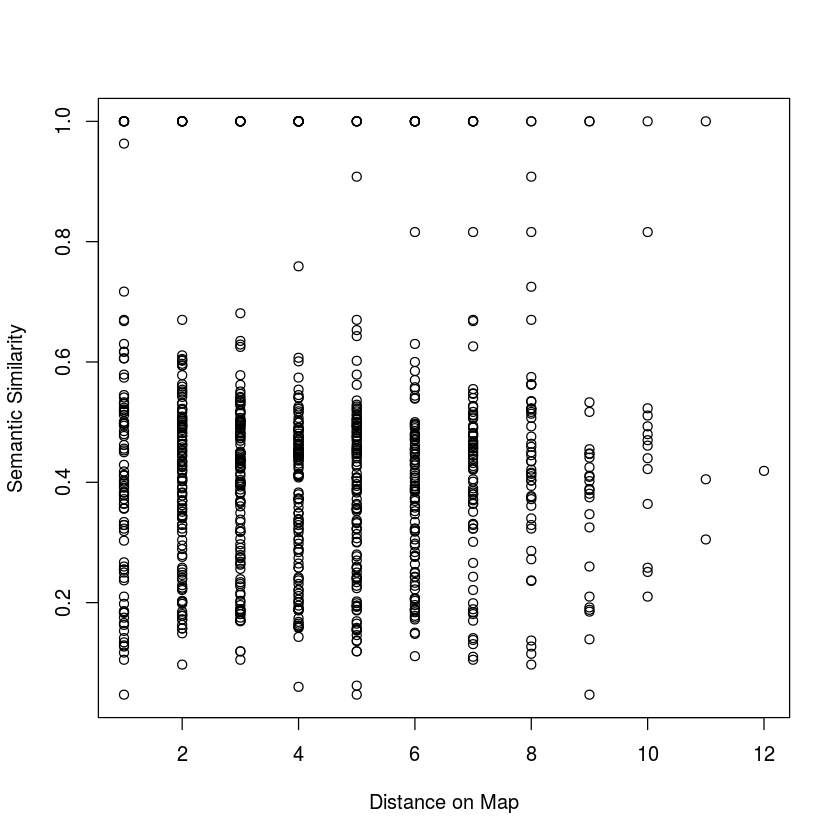

In [25]:
plot(distances, semSims, xlab="Distance on Map", ylab="Semantic Similarity")

In [26]:
cor(distances, semSims)

[1] 0.01009209